# Playground for Clustering Slides

- Reference Stephen W. Thomas
- Modified by Sourabh
- MMA 869

## ALWAYS: timestamp your notebook so you have an idea of when it was last executed

In [1]:
import datetime
print(datetime.datetime.now())

2019-11-25 23:36:12.499692


# Import needed libraries
- yellowbrick, pandas_profiling and KModes are usually not installed by default
- Install anaconda.org at https://www.anaconda.com/distribution/#download-section (Go with python 3.+)
- Once installed Launch  "Anaconda Navigator" then
- Environments => base(root) => PLAY symbol => Open Terminal => "pip install pandas-profiling"


In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Read in Data and Examine the Profile of the DAta

In [3]:
#df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/Mall_Customers.csv")
df = pd.read_csv("store_name_group.csv")

list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()



['Unnamed: 0',
 'exp4$Customer_ID_AR',
 'Customer_ID_AR',
 'Aldo',
 'Aldo.Accessories',
 'Alex.and.Ani',
 'AllSaints',
 'American.Eagle.Outfitters',
 'Ann.Taylor',
 'Anthropologie',
 'Apple',
 'Arc.teryx',
 'Aritzia',
 'Armani.Exchange',
 'Atelier.Cologne',
 'Aveda',
 'B2',
 'Babaton',
 'Banana.Republic',
 'Banana.Republic.Entrance',
 'Bath...Body.Works',
 'Bell.Mobility',
 'Bench',
 'Best.Buy.Mobile',
 'Bikini.Village',
 'Birks',
 'Bitter.Sweet',
 'Bluenotes',
 'Body.Shop',
 'Bose',
 'Brandy.Melville',
 'Breitling...European.Jewellers',
 'Browns.Shoes',
 'Burberry',
 'Bvlgari',
 'Calendar.Club',
 'Call.it.Spring',
 'Canada.Goose',
 'Cartier',
 'Centre.Corridor.East.1',
 'Centre.Corridor.East.2',
 'Centre.Corridor.West.1',
 'Centre.Corridor.West.2',
 'Centre.Court',
 'Champs',
 'Childrens.Place',
 'Club.Monaco',
 'Club.Monaco.Men',
 'Coach',
 'Concept.Store',
 'Cos',
 'Crate...Barrel',
 'Crate.and.Barrel.Entrance',
 'David.Yurman',
 'Davids',
 'Davids.Tea',
 'Diamond.Company',
 'Diesel

(733077, 285)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733077 entries, 0 to 733076
Columns: 285 entries, Unnamed: 0 to Zara.Home
dtypes: bool(283), int64(2)
memory usage: 209.0 MB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,733077.0,366539.000000,211621.245980,1.0,183270.0,366539.0,549808.0,733077.0
exp4$Customer_ID_AR,733077.0,366540.249294,211622.025303,1.0,183271.0,366540.0,549809.0,733080.0


,Unnamed: 0,exp4$Customer_ID_AR,Customer_ID_AR,Aldo,Aldo.Accessories,Alex.and.Ani,AllSaints,American.Eagle.Outfitters,Ann.Taylor,Anthropologie,...,West.Expansion.West.Corridor,West.Expansion.West.Entrance,White.House.Black.Market,Wilfred,Williams.Sonoma,WirelessWave,Wolford,Xpress,Zara,Zara.Home
0,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,4,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,6,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,7,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,8,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,9,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,10,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Unnamed: 0,exp4$Customer_ID_AR,Customer_ID_AR,Aldo,Aldo.Accessories,Alex.and.Ani,AllSaints,American.Eagle.Outfitters,Ann.Taylor,Anthropologie,...,West.Expansion.West.Corridor,West.Expansion.West.Entrance,White.House.Black.Market,Wilfred,Williams.Sonoma,WirelessWave,Wolford,Xpress,Zara,Zara.Home
733072,733073,733076,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733073,733074,733077,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733074,733075,733078,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
733075,733076,733079,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733076,733077,733080,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Plot the two metrics that are used for clustering

In [4]:
import matplotlib.pyplot as plt
 


# Plot the two clustering metrics using log scale to cope with the varying scales

In [5]:
import pandas as pd;



# Scale both clustering metrics to be on the same scale

In [6]:
X = df.copy()



df.head()
#Y = X.drop(['Encrypte.Mac'], axis=1) #axis 0 to drop rows

#Z = Y.drop(['min_Washroom_Dwell_time','max_Washroom_Dwell_time','min_Womens.Apparel_Dwell_time','max_Womens.Apparel_Dwell_time','min_Bank_Dwell_time','max_Bank_Dwell_time','min_Children.and.Infants.Apparel_Dwell_time', 'max_Children.and.Infants.Apparel_Dwell_time','min_Corridor_Dwell_time', 'max_Corridor_Dwell_time','min_Dining_Dwell_time','max_Dining_Dwell_time','min_Electronics_Dwell_time', 'max_Electronics_Dwell_time','min_Entrance_Dwell_time','max_Entrance_Dwell_time', 'min_Family.Apparel_Dwell_time', 'max_Family.Apparel_Dwell_time', 'min_Fashion.Accessories_Dwell_time', 'max_Fashion.Accessories_Dwell_time','min_Food.Court_Dwell_time', 'max_Food.Court_Dwell_time','min_Food.Court_Dwell_time', 'max_Food.Court_Dwell_time','min_Footwear_Dwell_time','max_Footwear_Dwell_time','min_Full.Service.Restaurants_Dwell_time', 'max_Full.Service.Restaurants_Dwell_time','min_Furniture...Home.Furnishings_Dwell_time', 'max_Furniture...Home.Furnishings_Dwell_time','min_General.merch.and.variety.stores_Dwell_time', 'max_General.merch.and.variety.stores_Dwell_time','min_Health.and.Beauty_Dwell_time', 'max_Health.and.Beauty_Dwell_time','min_Jewellery_Dwell_time', 'max_Jewellery_Dwell_time','min_Large.Format_Dwell_time', 'max_Large.Format_Dwell_time','min_Lux_Dwell_time', 'max_Lux_Dwell_time','min_Mens.Apparel_Dwell_time', 'max_Mens.Apparel_Dwell_time','min_Non.Food.Court.Fast.Food_Dwell_time', 'max_Non.Food.Court.Fast.Food_Dwell_time','min_Office.supply.stationary.gifts_Dwell_time', 'max_Office.supply.stationary.gifts_Dwell_time','min_Other.Services_Dwell_time', 'max_Other.Services_Dwell_time','min_Personal.Care.Services_Dwell_time', 'max_Personal.Care.Services_Dwell_time','min_Recreation_Dwell_time', 'max_Recreation_Dwell_time','min_Specialty.Apparel_Dwell_time', 'max_Specialty.Apparel_Dwell_time','min_Specialty.Food.Stores_Dwell_time', 'max_Specialty.Food.Stores_Dwell_time','min_Specialty.Leasing_Dwell_time', 'max_Specialty.Leasing_Dwell_time','min_Unassigned_Dwell_time', 'max_Unassigned_Dwell_time'], axis=1)

#JustLux = Z[['TotalVisits', 'TotalWeekendVisits', 'TotalWeekDayVisits', 'Total_Dwell_TIme', 'LuxuryTimesVisited','Total_Luxury_Dwell_Time','DiningTimesVisited','Total_Dining_Dwell_Time','Family.ApparelDaysVisited','Total_Family.Apparel_Dwell_Time','Fashion.AccessoriesDaysVisited','Total_Fashion.Accessories_Dwell_Time','FootwearDaysVisited','Total_Footwear_Dwell_Time', 'JewelleryDaysVisited','Total_Jewellery_Dwell_Time','Large.FormatDaysVisited','Total_Large.Format_Dwell_Time','Mens.ApparelDaysVisited','Total_Mens.Apparel_Dwell_Time','RecreationDaysVisited','Total_Recreation_Dwell_Time','Specialty.LeasingDaysVisited','Total_Specialty.Leasing_Dwell_Time','Womens.ApparelDaysVisited','Total_Womens.Apparel_Dwell_Time','ElectronicsDaysVisited','Total_Electronics_Dwell_Time','Full.Service.RestaurantsDaysVisited','Total_Full.Service.Restaurants_Dwell_Time','Total_Specialty.Apparel_Dwell_Time','Avg_Specialty.Apparel_Dwell_Time','Health.and.BeautyDaysVisited','Total_Health.and.Beauty_Dwell_Time','Specialty.Food.StoresDaysVisited','Total_Specialty.Food.Stores_Dwell_Time','Children.and.Infants.ApparelDaysVisited','Total_Children.and.Infants.Apparel_Dwell_Time']].copy()



#scaler = StandardScaler()

#Z = scaler.fit_transform(Z)

#box_plot_data=[X["AnnualIncome"],X["SpendingScore"]]
#plt.boxplot(box_plot_data,labels=lb, vert=0)
#plt.show()

#Z = Z.sample(frac=0.4, random_state=1)

,Unnamed: 0,exp4$Customer_ID_AR,Customer_ID_AR,Aldo,Aldo.Accessories,Alex.and.Ani,AllSaints,American.Eagle.Outfitters,Ann.Taylor,Anthropologie,...,West.Expansion.West.Corridor,West.Expansion.West.Entrance,White.House.Black.Market,Wilfred,Williams.Sonoma,WirelessWave,Wolford,Xpress,Zara,Zara.Home
0,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,4,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#JustLux.shape
X.info()
X.describe()
X.describe().transpose()
#JustLux.head(10)
X.head(10).transpose()
X.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733077 entries, 0 to 733076
Columns: 285 entries, Unnamed: 0 to Zara.Home
dtypes: bool(283), int64(2)
memory usage: 209.0 MB


,Unnamed: 0,exp4$Customer_ID_AR
count,733077.00000,733077.000000
mean,366539.00000,366540.249294
std,211621.24598,211622.025303
min,1.00000,1.000000
25%,183270.00000,183271.000000
50%,366539.00000,366540.000000
75%,549808.00000,549809.000000
max,733077.00000,733080.000000


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,733077.0,366539.000000,211621.245980,1.0,183270.0,366539.0,549808.0,733077.0
exp4$Customer_ID_AR,733077.0,366540.249294,211622.025303,1.0,183271.0,366540.0,549809.0,733080.0


,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,1,2,3,4,5,6,7,8,9,10
exp4$Customer_ID_AR,1,2,3,4,5,6,7,8,9,10
Customer_ID_AR,True,True,True,True,True,True,True,True,True,True
Aldo,False,False,False,False,False,False,False,False,False,False
Aldo.Accessories,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
WirelessWave,False,False,False,False,False,False,False,False,False,False
Wolford,False,False,False,False,False,False,False,False,False,False
Xpress,False,False,False,False,False,False,False,False,False,False
Zara,False,False,False,False,False,False,False,False,False,False


,Unnamed: 0,exp4$Customer_ID_AR,Customer_ID_AR,Aldo,Aldo.Accessories,Alex.and.Ani,AllSaints,American.Eagle.Outfitters,Ann.Taylor,Anthropologie,...,West.Expansion.West.Corridor,West.Expansion.West.Entrance,White.House.Black.Market,Wilfred,Williams.Sonoma,WirelessWave,Wolford,Xpress,Zara,Zara.Home
733072,733073,733076,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733073,733074,733077,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733074,733075,733078,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
733075,733076,733079,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733076,733077,733080,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Plot the Data

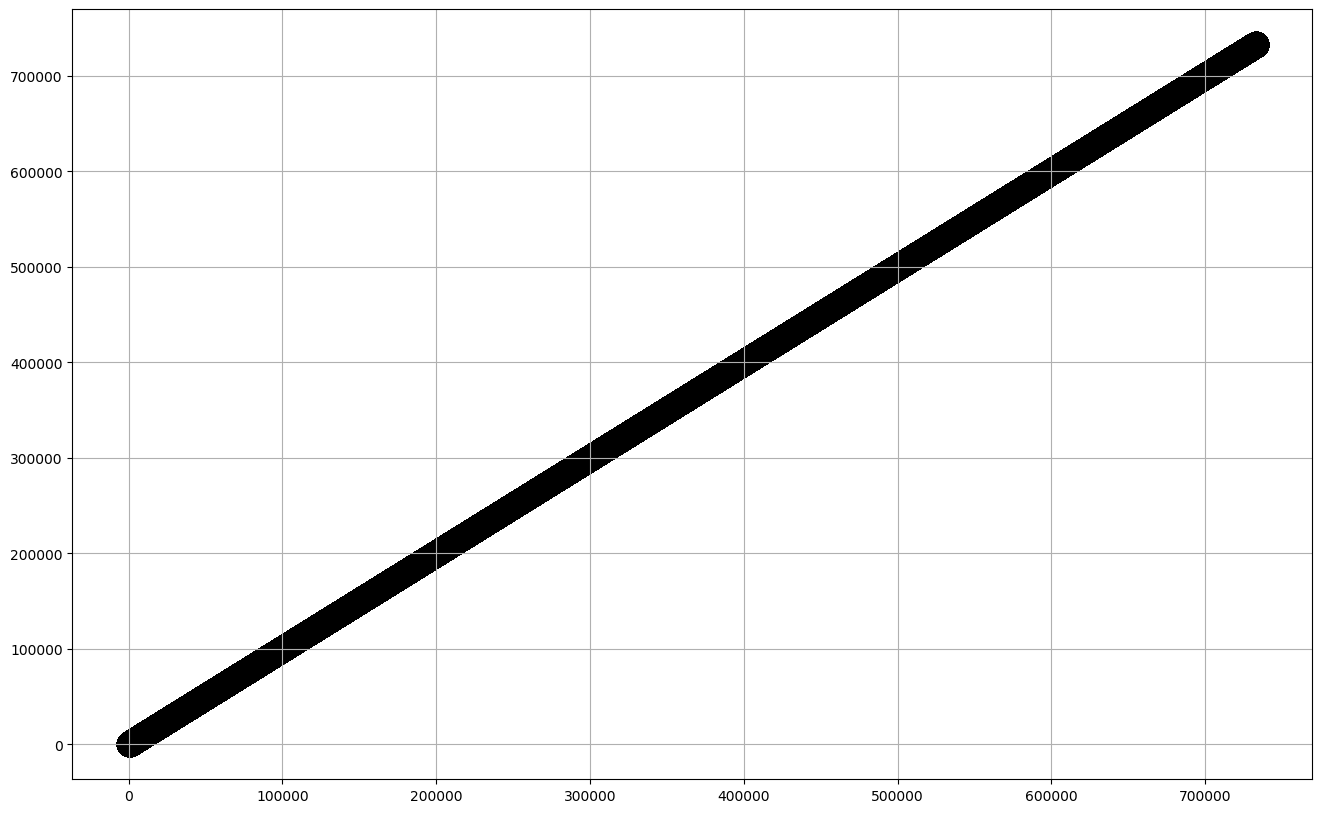

In [9]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c="black", s=300);
#plt.title("Mall Data", fontsize=20);

# K-Means

In [ ]:
k_means = KMeans(init='k-means++', n_clusters= 5, n_init=10, random_state=42, n_jobs=-1) #### n_jobs 
#k_means = KMeans(init='random', n_clusters=5, n_init=10, random_state=42)
#k_means.fit(X)

k_means.fit(X)

Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 615, in _queue_management_worker
    ready = wait(readers + worker_sentinels)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 868, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 800, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 65



In [ ]:
k_means.labels_

In [ ]:
# Let's look at the centers
k_means.cluster_centers_

# Plot the Clusters

In [ ]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=k_means.labels_);
# plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);


#for label in k_means.labels_:
#    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
#             horizontalalignment='center', verticalalignment='center', color='black',
#             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));4

def PrintLabels (k_means):
    for label in k_means.labels_:
        plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
                 horizontalalignment='center', verticalalignment='center', color='black',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));
    return

PrintLabels (k_means)

#plt.savefig('out/mall-kmeans-5.png');

## Internal Validation Metrics

In [ ]:
# WCSS == Inertia
k_means.inertia_

In [ ]:
silhouette_score(JustLux, k_means.labels_)

In [ ]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
import math;
sizes =200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

#plt.savefig('out/mall-kmeans-5-silhouette-size.png');

In [ ]:
#sklearn.metrics.davies_bouldin_score(X, k_means.labels_)

In [ ]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
#fig.savefig('out/mall-kmeans-5-silhouette.png', transparent=False);

In [ ]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(k_means)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
#plt.savefig('out/mall-kmeans-5-tsne.png', transparent=False);

## Elbow Method (Manual)

In [ ]:
inertias = {}
silhouettes = {}
for k in range(5, 10):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(Z)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(JustLux, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
#plt.savefig('out/mall-kmeans-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
#plt.savefig('out/mall-kmeans-elbow-silhouette.png');

## Elbow Method (Using Yellowbrick Package)

In [ ]:
model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(Z).poof();
#KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False).fit(X).poof();
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(Z).poof();

## Intepretting the Clusters

### Means

In [ ]:
k_means.cluster_centers_

In [ ]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)
    

# Find Examplars

Let's find the observation that is closest to the cluster center

In [ ]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar.transpose()

### Snake Plot

In [ ]:
dat = X.copy()

dat['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat.reset_index(),
id_vars=['Cluster'],
value_vars=['AnnualIncome','SpendingScore'],
var_name='Feature',
value_name='Value')

plt.title('Snake Plot, K-Means, K=5')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt)
plt.savefig('out/mall-kmeans-5-snake.png', transparent=False);

# Relative Importance Plots

In [ ]:
cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig('out/mall-kmeans-5-importance.png', transparent=False);

## Experiment with Lots of Ks

In [ ]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(X, k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={}, WCSS={:.2f}, Sil={:.2f})".format(k, wcss, sil), fontsize=20);
    plt.xlabel('Annual Income (K)', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.savefig('out/mall-kmeans-auto-{}-silhouette-size.png'.format(k));
    plt.show()
    
    
    visualizer = SilhouetteVisualizer(k_means)
    visualizer.fit(X)
    visualizer.poof()
    fig = visualizer.ax.get_figure()
    fig.savefig('out/mall-kmeans-auto-{}-silhouette-plot.png'.format(k), transparent=False);
    
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 21):
    do_kmeans(Z, k)

# Look at Individual Silhouette Scores

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=7, n_init=10, random_state=42)
k_means.fit(Z)
sample_silhouette_values = silhouette_samples(Z, k_means.labels_)

X_tmp = Z.copy()
X_tmp['Cluster ID'] = k_means.labels_

In [ ]:
X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

In [ ]:
plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X_tmp['AnnualIncome'], X_tmp['SpendingScore'], sizes=200*(X_tmp['Silhouette']+0.05), c=X_tmp['Cluster ID'])

plt.title("K-Means (K = {}, Sil={:.2f})".format(k_means.n_clusters, silhouette_score(X, k_means.labels_, metric='euclidean')), fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

#for label in k_means.labels_:
    #plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             #horizontalalignment='center', verticalalignment='center', color='black',
             #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));
    
#for i, txt in enumerate(X_tmp.index.values):
    #sil = X_tmp['Silhouette'].iloc[i]
    #if sil < 0.05:
        #plt.text(x=X_tmp['AnnualIncome'].iloc[i], y=X_tmp['SpendingScore'].iloc[i], s=txt, fontsize=22)

#plt.savefig('out/mall-kmeans-{}-silhouette-size-labels.png'.format(k_means.n_clusters));

In [ ]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('out/mall-kmeans-{}-silhouette-f.png'.format(k_means.n_clusters), transparent=False);

# DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=2)
db.fit(JustLux)

In [ ]:
db.labels_

In [ ]:
silhouette_score(JustLux, db.labels_)

In [ ]:
plt.figure(figsize=(16, 10));
plt.grid(True);

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)), fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
#plt.savefig('out/mall-dbscan-03.png', transparent=False);

## Elbow Method

In [ ]:
silhouettes = {}
for eps in np.arange(0.1, 0.6, 0.1):
    db = DBSCAN(eps=eps, min_samples=3).fit(Z)
    silhouettes[eps] = silhouette_score(Z, db.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid(True);
#plt.savefig('out/mall-dbscan-03-silhouette.png', transparent=False);

## Parameter Exploration

In [ ]:
def do_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels)
    
    if n_clusters <= 1:
        print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        return
    
    sil = silhouette_score(X, db.labels_)
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure(figsize=(16, 10));
    plt.grid(True);   
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}, n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil), fontsize=20);
    plt.xlabel('Annual Income (K)', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    #plt.savefig('out/mall-dbscan-auto-{}-{}.png'.format(eps, min_samples), transparent=False);
    

epss = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
min_samples = range(1, 10)

for prod in list(itertools.product(epss, min_samples)):
    do_dbscan(X, prod[0], prod[1])

# Hierarchical (Agglomerative)

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(JustLux)

In [ ]:
agg.labels_

In [ ]:
silhouette_score(JustLux, agg.labels_)

In [ ]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=agg.labels_);
plt.title("Agglomerative", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
#plt.savefig('out/mall-agg-5.png', transparent=False);

## Dendograms, Linkages, and Distance Metrics

Note that scikit learn does not itself currently support plotting dendograms. Instead, we'll use SciPy's `cluster.hierarchy` module to re-do the clustering, and plot the dendogram.

## Distance Metrics

In [ ]:
def plot_agg(X, linkage, metric):
    aggl = scipy.cluster.hierarchy.linkage(X, method=linkage, metric=metric)
    
    labels = scipy.cluster.hierarchy.fcluster(aggl, 5, criterion="maxclust")
    
    sil = 0
    n = len(set(labels))
    if n > 1:
        sil = silhouette_score(X , labels, metric=metric)
    print("Linkage={}, Metric={}, Clusters={}, Silhouette={:.3}".format(linkage, metric, n, sil))
    
    # Plot the dendogram
    plt.figure(figsize=(12, 5))  
    plt.title("Mall Dendogram (Linkage={}, Distance={}, N={}, Sil={:.3f})".format(linkage, metric, n, sil))  
    dend = scipy.cluster.hierarchy.dendrogram(aggl) 
    #plt.savefig('out/mall-agg-5-auto-dendogram-{}-{}.png'.format(linkage, metric), transparent=False);
    
    
    # Plot the points
    plt.style.use('default');
    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=labels);
    plt.title("Mall Agglomerative (Linkage={}, Distance={}, N={}, Sil={:.3f})".format(linkage, metric, n, sil), fontsize=20);
    plt.xlabel('Annual Income (K)', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    #plt.savefig('out/mall-agg-5-auto--{}-{}.png'.format(linkage, metric), transparent=False);

    
linkages = ['complete', 'ward', 'single', 'centroid', 'average']
metrics = ['euclidean', 'minkowski', 'cityblock', 'cosine', 'correlation', 'chebyshev', 'canberra', 'mahalanobis']

for prod in list(itertools.product(linkages, metrics)):
    
    # Some combos are not allowed
    if (prod[0] in ['ward', 'centroid']) and prod[1] != 'euclidean':
        continue
        
    plot_agg(X, prod[0], prod[1])

# Gaussian Mixture Models (GMM)

In [ ]:
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X)

labels = gmm.predict(X)
silhouette_score(X, labels)

In [ ]:
# From:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
def make_ellipses(gmm, ax):
    for n, label in enumerate(set(labels)):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color='grey')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.2)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')


plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=labels);
make_ellipses(gmm, plt.gca())
plt.title("GMM", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('out/mall-gmm-5.png', transparent=False);

# Categorical Data

How do we deal with categorical data? Standard K-Means and Standard Euclidean distance don't work. 

We have a number of options:

- Create dummy variables
- Run PCA first
- Use a categorical-aware distance metric, like Gower
- Use a categorical-aware algorithm, like k-mediods/k-modes

In [ ]:
scaler = StandardScaler()

X1 = df.copy()

# Create bins of Age
X1['AgeBin'] = pd.cut(X1['Age'], [0, 30, 55, 100])
X1 = X1.drop(['CustomerID', 'Age'], axis=1)

features = ['AnnualIncome', 'SpendingScore']
X1[features] = scaler.fit_transform(X1[features])

X1.info()
X1.describe().transpose()
X1.head(n=20)

# Create Dummy Variables

In [ ]:
# TODO

## Running PCA First

In [ ]:
# TODO

# Gower Distance

Unfortunately, and strangely, sci-kit learn doesn't yet have an implementation of the Gower distance metric. And I coldn't find any package that did. However, I did find some random guy's code that implemented the metric, and it seems to work well. Kudos to him!

In [ ]:
# From: https://sourceforge.net/projects/gower-distance-4python/

import numpy as np
import pandas as pd
from scipy.spatial import distance 
from sklearn.utils import validation
from sklearn.metrics import pairwise
from scipy.sparse import issparse


def check_pairwise_arrays(X, Y, precomputed=False, dtype=None):
    X, Y, dtype_float = pairwise._return_float_dtype(X, Y)

    warn_on_dtype = dtype is not None
    estimator = 'check_pairwise_arrays'
    if dtype is None:
        dtype = dtype_float

    if Y is X or Y is None:
        X = Y = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                            warn_on_dtype=warn_on_dtype, estimator=estimator)
    else:
        X = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)
        Y = validation.check_array(Y, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)

    if precomputed:
        if X.shape[1] != Y.shape[0]:
            raise ValueError("Precomputed metric requires shape "
                             "(n_queries, n_indexed). Got (%d, %d) "
                             "for %d indexed." %
                             (X.shape[0], X.shape[1], Y.shape[0]))
    elif X.shape[1] != Y.shape[1]:
        raise ValueError("Incompatible dimension for X and Y matrices: "
                         "X.shape[1] == %d while Y.shape[1] == %d" % (
                             X.shape[1], Y.shape[1]))

    return X, Y


# Vectorized Version
def gower_distances(X, Y=None, feature_weight=None, categorical_features=None):
    """Computes the gower distances between X and Y

    Gower is a similarity measure for categorical, boolean and numerical mixed
    data.

    
    Parameters
    ----------
    X : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    Y : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    feature_weight :  array-like, shape (n_features)
        According the Gower formula, feature_weight is an attribute weight.

    categorical_features: array-like, shape (n_features)
        Indicates with True/False whether a column is a categorical attribute.
        This is useful when categorical atributes are represented as integer
        values. Categorical ordinal attributes are treated as numeric, and must
        be marked as false.
        
        Alternatively, the categorical_features array can be represented only
        with the numerical indexes of the categorical attribtes.

    Returns
    -------
    similarities : ndarray, shape (n_samples, n_samples)

    Notes
    ------
    The non-numeric features, and numeric feature ranges are determined from X and not Y.
    No support for sparse matrices.

    """
    
    if issparse(X) or issparse(Y):
        raise TypeError("Sparse matrices are not supported for gower distance")
        
    y_none = Y is None
    
    
    # It is necessary to convert to ndarray in advance to define the dtype
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)

    array_type = np.object
    # this is necessary as strangelly the validator is rejecting numeric
    # arrays with NaN
    if  np.issubdtype(X.dtype, np.number) and (np.isfinite(X.sum()) or np.isfinite(X).all()):
        array_type = type(np.zeros(1,X.dtype).flat[0])
    
    X, Y = check_pairwise_arrays(X, Y, precomputed=False, dtype=array_type)
    
    n_rows, n_cols = X.shape
    
    if categorical_features is None:
        categorical_features = np.zeros(n_cols, dtype=bool)
        for col in range(n_cols):
            # In numerical columns, None is converted to NaN,
            # and the type of NaN is recognized as a number subtype
            if not np.issubdtype(type(X[0, col]), np.number):
                categorical_features[col]=True
    else:          
        categorical_features = np.array(categorical_features)
    
    
    #if categorical_features.dtype == np.int32:
    if np.issubdtype(categorical_features.dtype, np.int):
        new_categorical_features = np.zeros(n_cols, dtype=bool)
        new_categorical_features[categorical_features] = True
        categorical_features = new_categorical_features
    
    print(categorical_features)
  
    # Categorical columns
    X_cat =  X[:,categorical_features]
    
    # Numerical columns
    X_num = X[:,np.logical_not(categorical_features)]
    ranges_of_numeric = None
    max_of_numeric = None
    
        
    # Calculates the normalized ranges and max values of numeric values
    _ ,num_cols=X_num.shape
    ranges_of_numeric = np.zeros(num_cols)
    max_of_numeric = np.zeros(num_cols)
    for col in range(num_cols):
        col_array = X_num[:, col].astype(np.float32) 
        max = np.nanmax(col_array)
        min = np.nanmin(col_array)
     
        if np.isnan(max):
            max = 0.0
        if np.isnan(min):
            min = 0.0
        max_of_numeric[col] = max
        ranges_of_numeric[col] = (1 - min / max) if (max != 0) else 0.0


    # This is to normalize the numeric values between 0 and 1.
    X_num = np.divide(X_num ,max_of_numeric,out=np.zeros_like(X_num), where=max_of_numeric!=0)

    
    if feature_weight is None:
        feature_weight = np.ones(n_cols)
        
    feature_weight_cat=feature_weight[categorical_features]
    feature_weight_num=feature_weight[np.logical_not(categorical_features)]
    
    
    y_n_rows, _ = Y.shape
    
    dm = np.zeros((n_rows, y_n_rows), dtype=np.float32)
        
    feature_weight_sum = feature_weight.sum()

    Y_cat=None
    Y_num=None
    
    if not y_none:
        Y_cat = Y[:,categorical_features]
        Y_num = Y[:,np.logical_not(categorical_features)]
        # This is to normalize the numeric values between 0 and 1.
        Y_num = np.divide(Y_num ,max_of_numeric,out=np.zeros_like(Y_num), where=max_of_numeric!=0)
    else:
        Y_cat=X_cat
        Y_num = X_num
        
    for i in range(n_rows):
        j_start= i
        
        # for non square results
        if n_rows != y_n_rows:
            j_start = 0

      
        Y_cat[j_start:n_rows,:]
        Y_num[j_start:n_rows,:]
        result= _gower_distance_row(X_cat[i,:], X_num[i,:],Y_cat[j_start:n_rows,:],
                                    Y_num[j_start:n_rows,:],feature_weight_cat,feature_weight_num,
                                    feature_weight_sum,categorical_features,ranges_of_numeric,
                                    max_of_numeric) 
        dm[i,j_start:]=result
        dm[i:,j_start]=result
        

    return dm


def _gower_distance_row(xi_cat,xi_num,xj_cat,xj_num,feature_weight_cat,feature_weight_num,
                        feature_weight_sum,categorical_features,ranges_of_numeric,max_of_numeric ):
    # categorical columns
    sij_cat = np.where(xi_cat == xj_cat,np.zeros_like(xi_cat),np.ones_like(xi_cat))
    sum_cat = np.multiply(feature_weight_cat,sij_cat).sum(axis=1) 

    # numerical columns
    abs_delta=np.absolute( xi_num-xj_num)
    sij_num=np.divide(abs_delta, ranges_of_numeric, out=np.zeros_like(abs_delta), where=ranges_of_numeric!=0)

    sum_num = np.multiply(feature_weight_num,sij_num).sum(axis=1)
    sums= np.add(sum_cat,sum_num)
    sum_sij = np.divide(sums,feature_weight_sum)
    return sum_sij


In [ ]:
D = gower_distances(X1)
aggl = scipy.cluster.hierarchy.linkage(D)
labels = scipy.cluster.hierarchy.fcluster(aggl, 6, criterion="maxclust")
n = len(set(labels))

# Plot the dendogram
plt.figure(figsize=(12, 5));
plt.title("Mall Dendogram (N={})".format(n)); 
dend = scipy.cluster.hierarchy.dendrogram(aggl) 
plt.savefig('out/mall-agg-5-gower-dendogram.png', transparent=False);

In [ ]:
def describe_clusters(X, labels):
    X2 = X.copy()
    X2['ClusterID'] = labels
    print('\nCluster sizes:')
    print(X2.groupby('ClusterID').size())
    
    
    print('\nCluster stats:')
    print(X2.groupby('ClusterID').mean())
    print(X2.groupby('ClusterID').agg(lambda x: x.value_counts().index[0]))
    
    #display(X2.groupby('ClusterID').describe(include='all').transpose())

describe_clusters(X1, labels)

# K-Modes
`kmodes` is an experimental library in Python

In [ ]:
kmodes = KModes(n_clusters=6, init='Huang', n_init=100, verbose=0)
kmodes.fit(X1)

In [ ]:
kmodes.labels_

In [ ]:
# Print the cluster centroids
print(kmodes.cluster_centroids_)

kmodes.labels_

describe_clusters(X1, kmodes.labels_)

plt.style.use('default');
fig = plt.figure(figsize=(16, 10));
plt.grid(True);
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1['AnnualIncome'], X1['SpendingScore'], X1['Male'], s=200, c=kmodes.labels_);
plt.title("KModes", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('out/mall-kmodes-6-3d.png', transparent=False);

# Distance Metrics

In [ ]:
import scipy.spatial.distance as dist
import numpy as np

# Prepare 3 vectors (data points) of 2 dimensions
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':[1, 2, 5], 'dim2':[1, 1, 5]})
display(points.head())

for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Euclidean distance: {:.2f}'.format(dist.euclidean(v1, v2)))
    print('Manhattan distance: {:.2f}'.format(dist.cityblock(v1, v2)))
    print('Chebyshev distance: {:.2f}'.format(dist.chebyshev(v1, v2)))
    print('Canberra distance: {:.2f}'.format(dist.canberra(v1, v2)))
    print('Cosine distance: {:.2f}'.format(dist.cosine(v1, v2)))
    
    
plt.style.use('default');

plt.figure(figsize=(10, 10));
plt.grid(True);

plt.scatter(points['dim1'], points['dim2'], s=6000, marker='o', edgecolors='black');
#plt.title("Distances", fontsize=20);
plt.xlabel('Feature 1', fontsize=32);
plt.ylabel('Feature 2', fontsize=32);
plt.xticks(fontsize=26);
plt.yticks(fontsize=26);
plt.xlim(left=0, right=6);
plt.ylim(bottom=0, top=6);

for i, txt in enumerate(points['id']):
    plt.text(x=points['dim1'].iloc[i], y=points['dim2'].iloc[i], s=txt, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='white');
    


plt.savefig('out/distances.png', transparent=False);

## Categorical Features

In [ ]:
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':['young', 'young', 'old'], 
                            'dim2':['male', 'male', 'female'], 'dim3':['rural', 'city', 'city'],
                            'dim4':['student', 'student', 'prof'], 'dim5':['low', 'low', 'high'],})
display(points.head())

for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2', 'dim3', 'dim4', 'dim5']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2', 'dim3', 'dim4', 'dim5']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Hamming distance: {:.2f}'.format(dist.hamming(v1, v2)))